In [1]:
import numpy as np 
import numpy.random as rand 
import matplotlib.pyplot as plt 
import h5py 
from statsmodels.tsa import api as tsa 
from statsmodels.graphics.tsaplots import plot_acf 
from statsmodels.tsa.arima_model import ARIMA 
%matplotlib inline 

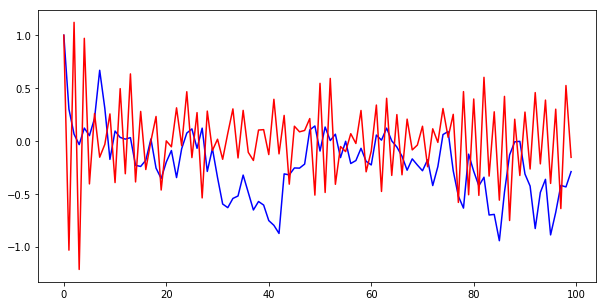

In [3]:
z1 = np.zeros(100) 
z2 = np.zeros(100) 
z1[0] = 1 
z2[0] = 1 
for i in range(1,100): 
    z1[i] = 0.8 * z1[i - 1] + 0.2 * np.random.randn()  # positive AR 
    z2[i] = -0.8 * z2[i - 1] + 0.2 * np.random.randn() # negative AR 
plt.figure(figsize = (10, 5)) 
plt.plot(z1, 'b') 
plt.plot(z2, 'r')
plt.show()

<Figure size 720x360 with 0 Axes>

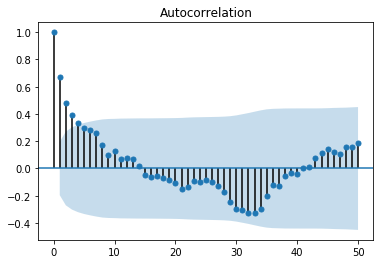

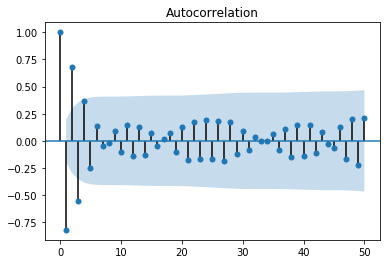

In [5]:
plt.figure(figsize = (10, 5)) 
plot_acf(z1, lags=50) 
plot_acf(z2, lags=50)
plt.show() 

In [6]:
from statsmodels.tsa.stattools import acf
ac1=acf(z1)
print(0.8,ac1[1])
ac2=acf(z2)
print(-0.8,ac2[1])

print(0.8,0.8**2,0.8**3,0.8**4)
print(ac1[1:5])
print(-0.8,0.8**2,-0.8**3,0.8**4)
print(ac2[1:5])


0.8 0.6724665660669781
-0.8 -0.8205161771999866
0.8 0.6400000000000001 0.5120000000000001 0.4096000000000001
[0.67246657 0.48190807 0.3926585  0.33704129]
-0.8 0.6400000000000001 -0.5120000000000001 0.4096000000000001
[-0.82051618  0.68025479 -0.5496057   0.36819062]


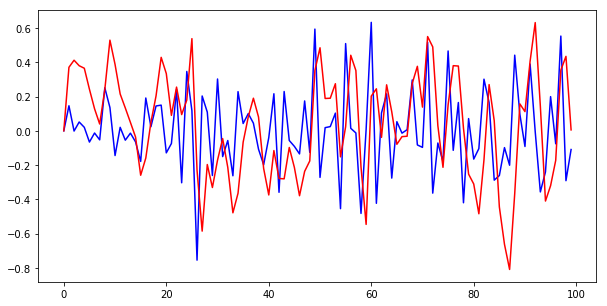

In [21]:
z3 = np.zeros(100) 
z4 = np.zeros(100) 
ar = 0.2 * np.random.randn(100) 
for i in range(1, 100): 
    z3[i] = ar[i] - 0.8 * ar[i - 1] 
    z4[i] = ar[i] + 0.8 * ar[i - 1] 
plt.figure(figsize = (10, 5)) 
plt.plot(z3, 'b') 
plt.plot(z4, 'r')
plt.show()

<Figure size 720x360 with 0 Axes>

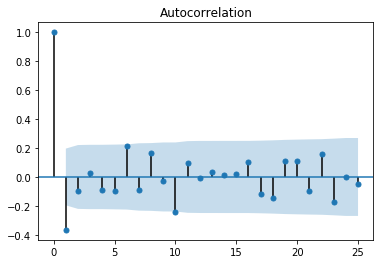

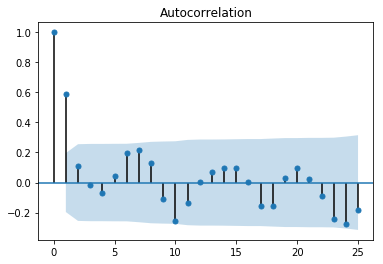

In [22]:
plt.figure(figsize = (10, 5)) 
plot_acf(z3, lags=25) 
plot_acf(z4, lags=25)
plt.show() 

In [23]:
print(z3[1])

0.146094056125808


In [24]:
from math import sqrt
a = 1
b = 1 / ((-0.8) / (1 + 0.8**2))
c = 1
w_c1 = (-b + sqrt(b**2 -4*a*c)) / 2*a
w_c2 = (-b - sqrt(b**2 -4*a*c)) / 2*a
print(w_c1)
print(w_c1)

1.2500000000000009
1.2500000000000009


In [25]:
from statsmodels.tsa.stattools import acf
a3=acf(z3)
a4=acf(z4)
print(-0.8,a3[1])
print(0.8,a4[1])

-0.8 -0.3658915890515382
0.8 0.5896384061765585


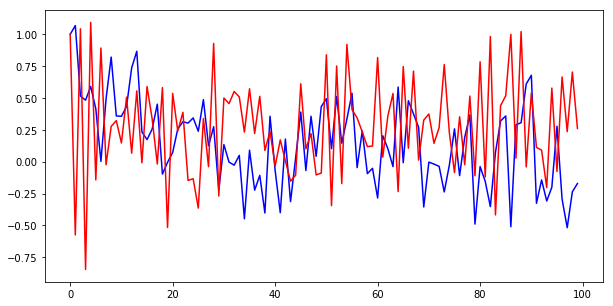

In [20]:
z5 = np.zeros(100)
z6 = np.zeros(100)
z5[0]= 1
z6[0]= 1
for i in range(1,100):
    z5[i] = 0.8 * z1[i - 1] + 0.2 * np.random.randn() -  0.3 * (0.2 * np.random.randn() - 1) # positive AR
    z6[i] = -0.8 * z2[i - 1] + 0.2 * np.random.randn()-  0.3 * (0.2 * np.random.randn() - 1) # negative AR
plt.figure(figsize = (10, 5))
plt.plot(z5, 'b')
plt.plot(z6, 'r')
plt.show()


<Figure size 720x360 with 0 Axes>

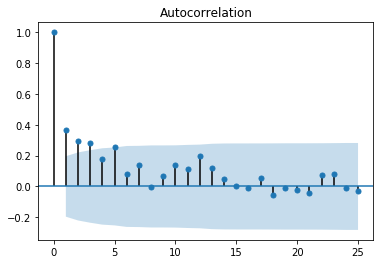

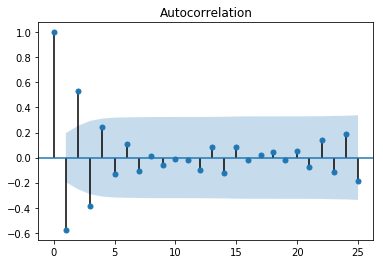

In [26]:
plt.figure(figsize = (10, 5))
plot_acf(z5, lags=25)
plot_acf(z6, lags=25)
plt.show()

In [28]:
from statsmodels.tsa.arima_process import arma_generate_sample 
ar = np.array([0.75, -0.25])  # AR autoregressive coefficients 
ma = np.array([0.65, 0.35])   # MA moving-average coefficients    
y = arma_generate_sample(np.r_[1, -ar], np.r_[1, ma], 100) # estimate the time series with 100 points from ARMA(2, 2) model 
print(y)

[ 0.38468887  0.85233843  1.45580375  0.25181792 -1.75174775 -3.88102212
 -2.39269454 -0.85017702 -0.74473019 -1.55882333 -2.21392345 -2.2578444
 -2.09341388  0.09577709  1.34322273  1.50693173  2.27119686  2.42039898
 -0.19050156 -2.03243945 -3.67349406 -2.97032762  0.38328472  2.01207229
  3.06973596  1.1627638  -0.21712944 -1.86349301 -0.51185749  1.04438448
  2.02160566  2.78088281  3.73213226  3.7946681   3.24706358  2.90767951
  3.83376656  3.1063013   2.25630866  0.87545866 -0.00801428  2.26968109
  2.79659397  3.0235005   2.6820785   2.48562388  0.50184708  0.3715978
  0.34223122  0.91978024 -0.1175268  -2.09980011 -3.93786568 -4.93991941
 -4.08488227 -3.65426712 -2.47123448 -0.19202726  0.95617218  1.87941323
  0.74258706 -1.18836881 -1.83894433 -1.97214031 -1.98947176 -1.70727769
  0.86827914  1.16931944  0.62328672 -0.06342412 -1.55347949 -2.06655916
 -1.43186489 -1.08181107  0.06606616 -1.27722369 -0.93970244  0.28161052
  2.17210259  0.55466481 -2.02511416 -3.84723945 -4.1

In [30]:
TEST = [0.00, 9.99, 12.89, 10.70, 5.12, -1.21, -6.50, -7.96, -4.30, 0.42, 3.41, 
4.50, 3.57, 2.24, 1.78, 0.89, -1.20, -3.43, -2.35, -0.85, -0.21, -0.08, 0.95, 0.45]

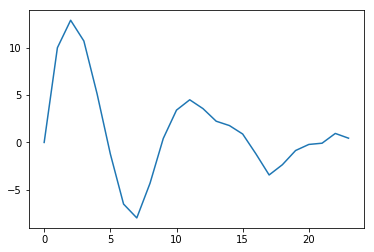

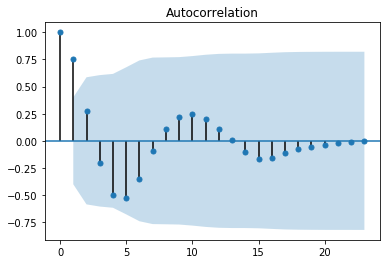

In [31]:
plt.plot(TEST)
plot_acf(TEST)
plt.show()

In [32]:
arima1 = ARIMA(TEST, order = (1, 0, 0))  # create model 
model_fit1 = arima1.fit(disp = False, trend='nc') # fit it to your data 
print(model_fit1.summary()) # print out the table of results 
arima2 = ARIMA(TEST, order = (2, 0, 0))    
model_fit2 = arima2.fit(disp = False, trend='nc') 
print(model_fit2.summary()) 
arima3 = ARIMA(TEST, order = (3, 0, 0)) 
model_fit3 = arima3.fit(disp = False, trend='nc')
print(model_fit3.summary()) 

c:\python36\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
c:\python36\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
c:\python36\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which wi

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   24
Model:                     ARMA(1, 0)   Log Likelihood                 -62.425
Method:                       css-mle   S.D. of innovations              3.207
Date:                Mon, 22 Apr 2019   AIC                            128.850
Time:                        19:14:30   BIC                            131.206
Sample:                             0   HQIC                           129.475
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.7426      0.123      6.053      0.000       0.502       0.983
                                    Roots                                    
                  Real          Imaginary           M

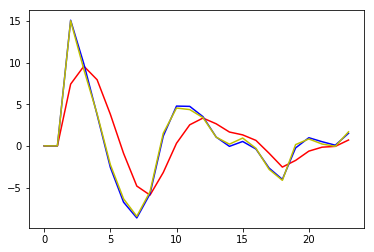

In [36]:
plt.plot(model_fit1.fittedvalues,'r')
plt.plot(model_fit2.fittedvalues,'b')
plt.plot(model_fit3.fittedvalues,'y')
plt.show()

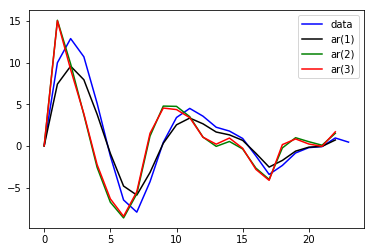

In [37]:
plt.plot(TEST,'b',label = 'data')
plt.plot(model_fit1.fittedvalues[1:],'k',label = 'ar(1)')
plt.plot(model_fit2.fittedvalues[1:],'g',label = 'ar(2)')
plt.plot(model_fit3.fittedvalues[1:],'r',label = 'ar(3)')
plt.legend()
plt.show()

point1= 0.7550097626743364 point2= 0.27235863768287977


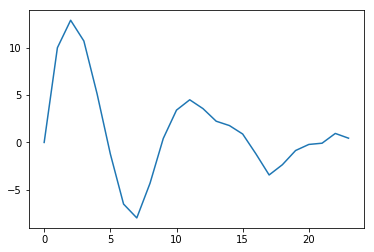

<Figure size 720x360 with 0 Axes>

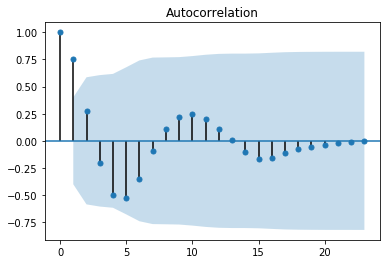

In [41]:
plt.plot(TEST)
plt.figure(figsize = (10, 5))
plot_acf(TEST)
ac1=acf(TEST)
print("point1=",ac1[1],"point2=",ac1[2])
plt.show()

In [42]:
p1=ac1[1]      
p2=ac1[2]      
ar1=p1 *(1-p2)/(1-p1**2)   
ar2=p2 -p1**2 /(1-p1**2)   
print(ar1,ar2)

1.2777374692491614 -1.0534377138959903


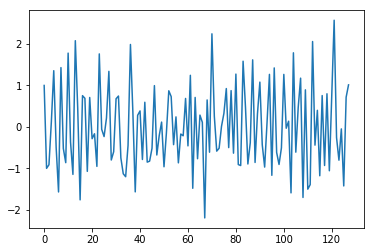

In [46]:
file = h5py.File('12.mat', 'r')  
data = file.get('z12') 
Z = np.array(data)
plt.plot(Z)
plt.show()

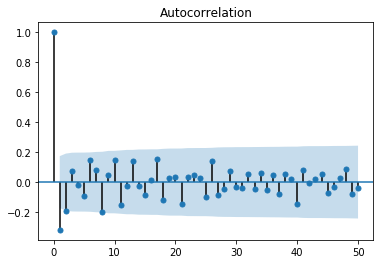

In [48]:
plot_acf(Z, lags=50)
plt.show()

In [49]:
arima1 = ARIMA(Z ,order = (1, 0, 0)) 
model_fit1 = arima1.fit(disp = False, trend='nc') 
print(model_fit1.summary()) 

arima2 = ARIMA(Z, order = (2, 0, 0))
model_fit2 = arima2.fit(disp = False, trend='nc')
print(model_fit2.summary())

arima3 = ARIMA(Z, order = (3, 0, 0))
model_fit3 = arima3.fit(disp = False, trend='nc')
print(model_fit3.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  128
Model:                     ARMA(1, 0)   Log Likelihood                -174.377
Method:                       css-mle   S.D. of innovations              0.945
Date:                Mon, 22 Apr 2019   AIC                            352.754
Time:                        19:48:59   BIC                            358.458
Sample:                             0   HQIC                           355.071
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y       -0.3218      0.084     -3.833      0.000      -0.486      -0.157
                                    Roots                                    
                  Real          Imaginary           M

In [50]:
print('For our test time series data the AR(2) should be the best model, based on comparing AIC, BIC and HQIC with other models. ')

For our test time series data the AR(2) should be the best model, based on comparing AIC, BIC and HQIC with other models. 


In [57]:
arima1 = ARIMA(Z ,order = (0, 0, 1)) 
model_fit1 = arima1.fit(disp = False, trend='nc') 
print(model_fit1.summary()) 

arima2 = ARIMA(Z, order = (1, 0, 2))
model_fit2 = arima2.fit(disp = False, trend='nc')
print(model_fit2.summary())



                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  128
Model:                     ARMA(0, 1)   Log Likelihood                -165.668
Method:                       css-mle   S.D. of innovations              0.881
Date:                Mon, 22 Apr 2019   AIC                            335.335
Time:                        19:58:38   BIC                            341.039
Sample:                             0   HQIC                           337.653
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.y       -0.6237      0.074     -8.475      0.000      -0.768      -0.479
                                    Roots                                    
                  Real          Imaginary           M